##### I used Vader library to calculate sentiment analysis of the data with othe techniques in order to clean the data like word tokenize , stop words , word net lemmatizer , nltk and re library to clean the data and apply sentiment analysis algorithm 

##### import libraries

In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
import pandas as pd
from wordcloud import WordCloud
import nltk
import re

##### import stop words and lemmatizer

In [13]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english')) - {'not'}

##### import csv file 

In [14]:
amazon_reviews_data=pd.read_csv('Amazon_Synthetic_Training_Data.csv')

##### cleaning data using re.sub technique remove whitespaces , punctuations , comma , any hashtags 

In [15]:
def cleaning_text(sentence) :
    sentence = re.sub(r'http\S+\s*|\W+|#\S+|[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]|\s+|[0-9]', ' ', sentence.lower())
    return sentence

##### applying tokenization and lemmatization 

In [16]:
def tokenization_lemmatize_stopwording(sentence):
    tokens = [lemmatizer.lemmatize(word) for word in word_tokenize(sentence) if word not in stop_words]
    return ' '.join(tokens)

##### applying vader library to calculate the sentiment analysis using polarity score technique .

In [18]:
# Function to print sentiments of the sentence.
def sentiment_scores(sentence):
    cleaned_sentence = tokenization_lemmatize_stopwording(cleaning_text(sentence))
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(cleaned_sentence)
    
    sentiment_score = sentiment_dict['compound']
    
    if sentiment_score >= 0.05:
        sentiment_label = "Positive"
    elif sentiment_score <= -0.05:
        sentiment_label = "Negative"
    else:
        sentiment_label = "Neutral"
    
    return sentiment_label, sentiment_score



##### Append Most Common Keywords in a Sentence Based on Calculating Word Cloud 

In [19]:
# Function to get the most common words in a sentence
def get_most_common_words(sentence, num_words=2):
    sentence=tokenization_lemmatize_stopwording(cleaning_text(sentence))
    words = word_tokenize(sentence.lower())
    freq_dist = FreqDist(words)
    most_common_words = [word for word, _ in freq_dist.most_common(num_words)]
    return most_common_words




##### Finding Sentiment analysis of the data .

In [20]:
amazon_reviews_data=amazon_reviews_data[0:500]
amazon_reviews_data[['Sentiment_Label', 'Sentiment_Score']] = amazon_reviews_data['Review'].apply(sentiment_scores).apply(pd.Series)
amazon_reviews_data["Common Words"] = amazon_reviews_data['Review'].apply(lambda x: ", ".join(get_most_common_words(x,3)))

##### Checking dataframe Values

In [26]:
amazon_reviews_data.head(2)

,Review,Aspect,Sentiment_Label,Sentiment_Score,Common Words
0,Range stock what. Return free none keep attorn...,Durability,Positive,0.6908,"range, stock, return"
1,Better participant this available report artis...,Ease of Use,Positive,0.9081,"report, better, participant"


##### Give a Frequqncy Bar Chart 

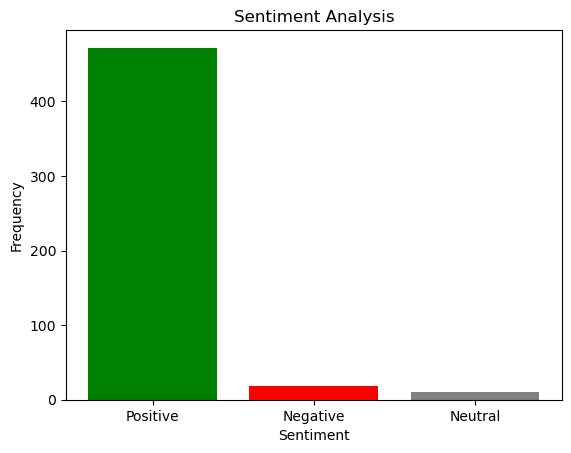

In [27]:
# Assuming you already have a DataFrame named 'amazon_reviews_data' with 'Sentiment_Label' column
# Create a bar chart
sentiment_counts = amazon_reviews_data['Sentiment_Label'].value_counts()

# Plot the bar chart
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'gray'])

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis')

# Show the plot
plt.show()


##### Word Cloud Visualization Having Positive and Negative Reviews

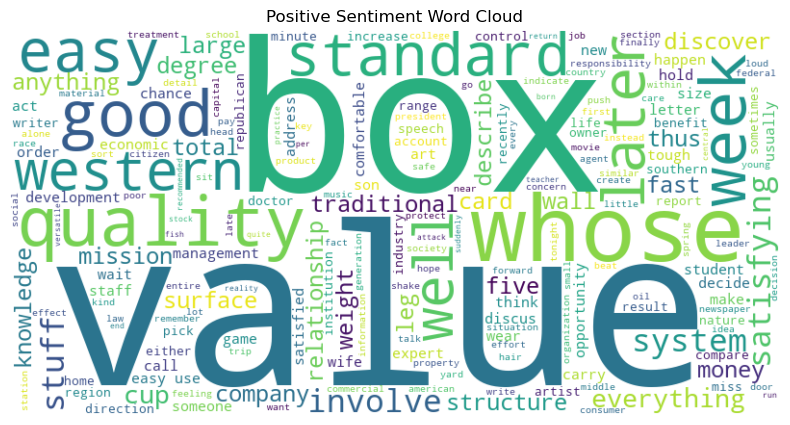

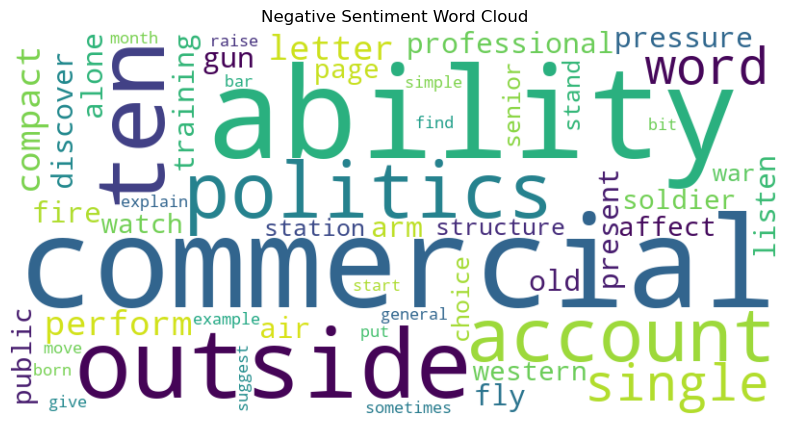

In [32]:


# Assuming you have a DataFrame named 'amazon_reviews_data' with a 'Sentiment_Label' column and a 'Common Words' column

# Function to generate word cloud
def generate_wordcloud(sentiment_label):
    # Filter data for the specific sentiment
    sentiment_data = amazon_reviews_data[amazon_reviews_data['Sentiment_Label'] == sentiment_label]
    
    # Concatenate all common words for the sentiment
    all_words = ' '.join(sentiment_data['Common Words'])
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
    
    # Plot the WordCloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{sentiment_label} Sentiment Word Cloud')
    plt.show()

# Generate word cloud for Positive sentiment
generate_wordcloud('Positive')

# Generate word cloud for Negative sentiment
generate_wordcloud('Negative')
